In [2]:
%%bash

# set up SUBJECTS_DIR & freesurfer 8
base_path=$(dirname "$PWD")
export FREESURFER_HOME=/usr/local/freesurfer/8.0.0
source ${FREESURFER_HOME}/SetUpFreeSurfer.sh

# define paths to the unpreprocessed pet.nii.gz & T1w.nii.gz 
pet=${base_path}/test_subject/pet.nii.gz

fsl_motion_outliers -i ${pet} --fd -s ${base_path}/test_subject/fd_motion.txt -o ${base_path}/test_subject/mc_out

bash: fg: %%bash: no such job
-------- freesurfer-linux-ubuntu22_x86_64-8.0.0-20250204-0f2bd3a --------
Setting up environment for FreeSurfer/FS-FAST (and FSL)
FREESURFER_HOME   /usr/local/freesurfer/8.0.0
FSFAST_HOME       /usr/local/freesurfer/8.0.0/fsfast
FSF_OUTPUT_FORMAT nii.gz
SUBJECTS_DIR      /usr/local/freesurfer/8.0.0/subjects
MNI_DIR           /usr/local/freesurfer/8.0.0/mni
FSL_DIR           /usr/local/fsl


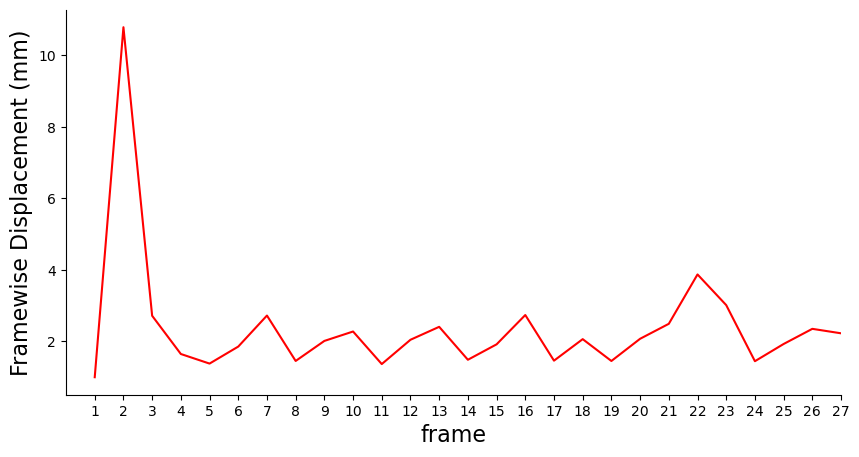

In [38]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os

base_path = os.path.dirname(os.getcwd())
motion_file = f'{base_path}/test_subject/fd_motion.txt'

motion = pd.read_csv(motion_file, header=None,names=['FD'])
motion = motion.reset_index() +1 

fig, ax = plt.subplots(figsize=(10, 5))
sns.despine()

sns.lineplot(
    data=motion,
    y="FD",
    x='index',
    color='r',
    ax=ax);

ax.set_xlabel('frame', size=16);
ax.set_ylabel('Framewise Displacement (mm)', size=16);
ax.set_xlim([0,27])
ax.set_xticks(range(1,28));

plt.savefig(f'{base_path}/figures/test_subject_framewise_motion_pet.png')
